<a href="https://colab.research.google.com/github/ramonfsk/machineLearning/blob/master/regressaoLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
uri = 'https://raw.githubusercontent.com/ramonfsk/machineLearning/master/reg-linear/Dados/Consumo_cerveja.csv'
dados = pd.read_csv(uri, sep=';')

dados.shape

(365, 7)

In [3]:
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


In [4]:
dados.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


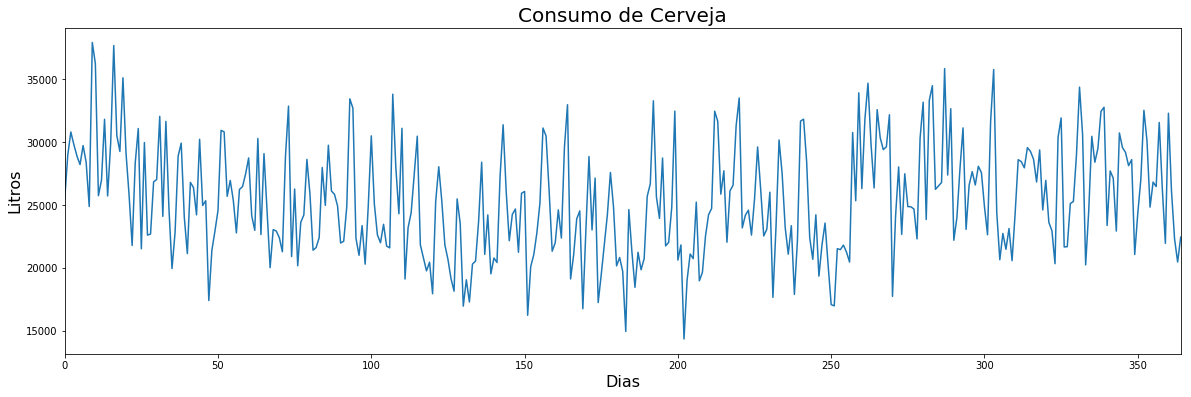

In [5]:
fig, ax = plt.subplots(figsize=(20,6))

ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax = dados.consumo.plot()

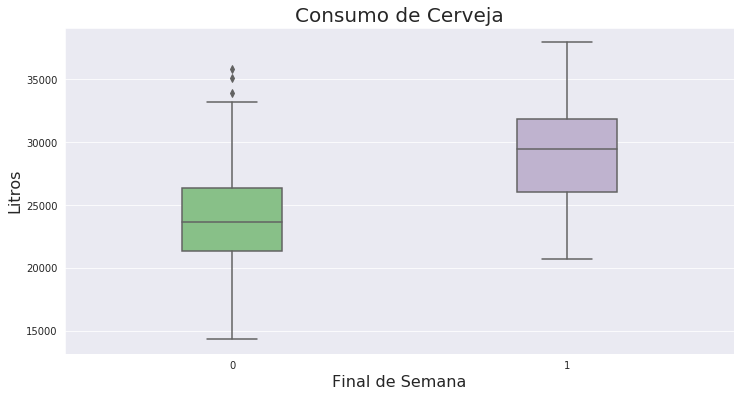

In [6]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
#ax = sns.boxplot(data=dados.consumo, orient='v', width=0.3)
ax = sns.boxplot(y='consumo', x='fds', data=dados, orient='v', width=0.3)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de Semana', fontsize=16)
ax

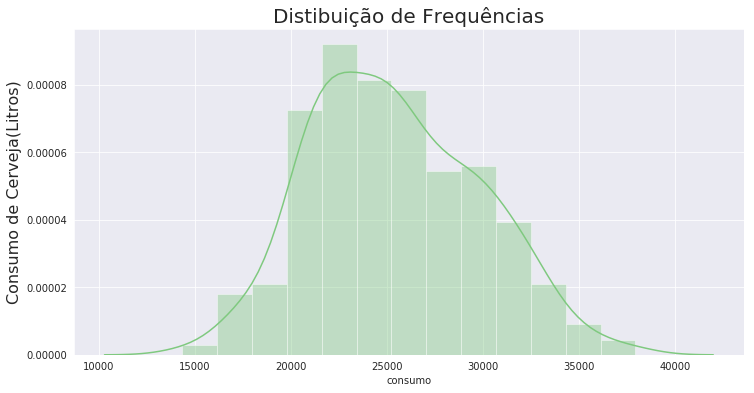

In [7]:
ax = sns.distplot(dados.consumo)
ax.figure.set_size_inches(12,6)
ax.set_title('Distibuição de Frequências', fontsize=20)
ax.set_ylabel('Consumo de Cerveja(Litros)', fontsize=16)
ax

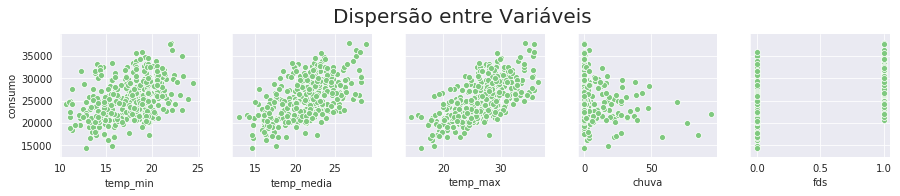

In [8]:
#ax = sns.pairplot(dados)
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'])
ax.fig.suptitle('Dispersão entre Variáveis', fontsize=20, y=1.07)
ax

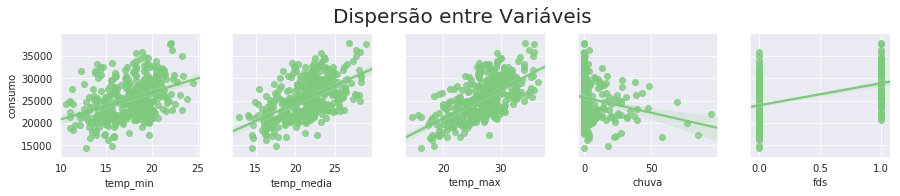

In [9]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'], kind='reg')
ax.fig.suptitle('Dispersão entre Variáveis', fontsize=20, y=1.07)
ax

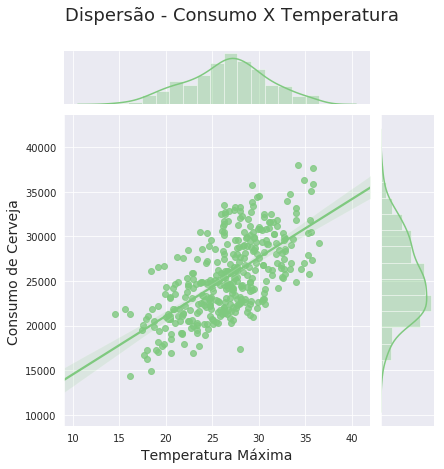

In [10]:
ax =sns.jointplot(x='temp_max', y='consumo', data=dados, kind='reg')
ax.fig.suptitle('Dispersão - Consumo X Temperatura', fontsize=18, y=1.07)
ax.set_axis_labels('Temperatura Máxima', 'Consumo de Cerveja', fontsize=14)
ax

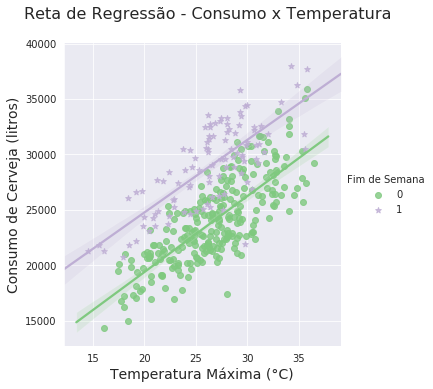

In [11]:
ax = sns.lmplot(x='temp_max', y='consumo', data=dados, hue='fds', markers=['o', '*'], legend=False)
ax.fig.suptitle('Reta de Regressão - Consumo x Temperatura', fontsize=16, y=1.06)
ax.set_xlabels('Temperatura Máxima (°C)', fontsize=14)
ax.set_ylabels('Consumo de Cerveja (litros)', fontsize=14)
ax.add_legend(title='Fim de Semana')
ax

In [0]:
from sklearn.model_selection import train_test_split

y = dados['consumo']
x = dados[['temp_max', 'chuva', 'fds']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=2811)

In [13]:
x_train.shape

(244, 3)

In [14]:
x_test.shape

(121, 3)

In [15]:
x_train.shape[0] + x_test.shape[0]

365

In [16]:
x.shape[0] * 3

1095

In [17]:
x.shape[0] * 0.7

255.49999999999997

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

modelo = LinearRegression()
modelo.fit(x_train, y_train)

print('R² = {}'.format(modelo.score(x_train, y_train).round(2)))

y_previsto = modelo.predict(x_test)

print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.74
R² = 0.68


In [21]:
entrada = x_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


In [22]:
modelo.predict(entrada)[0]

26104.902268612546

In [25]:
temp_max = 40
chuva = 0
fds = 1
entrada = [[temp_max, chuva, fds]]

print('{0:2f} litros '.format(modelo.predict(entrada)[0]))

38760.513943 litros 


In [28]:
modelo.intercept_

5848.645512209721

In [29]:
type(modelo.intercept_)

numpy.float64

In [31]:
modelo.coef_

array([ 688.30033749,  -60.40192927, 5379.85493077])

In [33]:
type(modelo.coef_)

numpy.ndarray

In [35]:
x.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

In [0]:
index = ['Intercept', 'Temperatura Maxima', 'Chuva(mm)', 'Final de Semana']

In [40]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parametros'])

,Parametros
Intercept,5848.645512
Temperatura Maxima,688.300337
Chuva(mm),-60.401929
Final de Semana,5379.854931


In [0]:
y_previsto_train = modelo.predict(x_train)

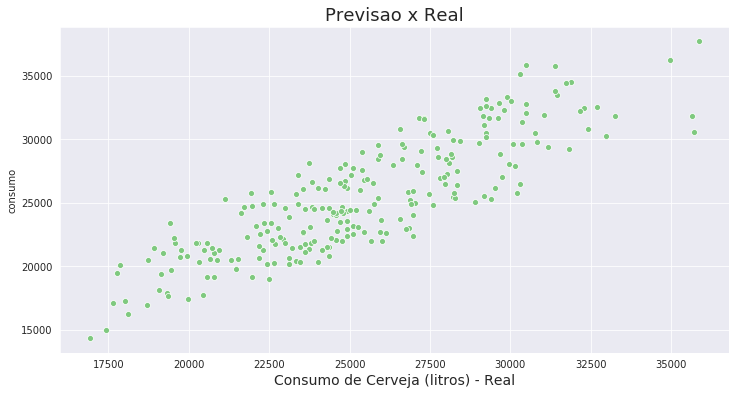

In [42]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsao x Real', fontsize=18)
ax.set_ylabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_xlabel('Consumo de Cerveja (litros) - Real', fontsize=14)
ax

In [0]:
residuo = y_train - y_previsto_train

In [44]:
residuo

15     1702.737310
216   -2531.414692
104   -1239.074759
21     3854.175487
151   -1877.167343
0     -2757.406481
274    -868.066548
249   -2410.133554
255   -1058.135877
199    3417.520816
323   -3690.021505
286    1327.794869
3     -1042.407780
181     865.197569
76    -2269.683646
13     2670.786100
154     335.316354
161     251.075409
31     1556.090107
295    2764.141126
157    1236.030715
55     -529.041542
102    -917.964186
25    -2826.505069
185     350.913152
342    2084.775072
163    -480.929690
339    2285.130300
303    4385.299669
272    3188.265173
          ...     
273    -896.719760
298    4334.209661
134    -109.102768
361    1868.735477
318   -1801.805032
101   -3847.819117
119    1732.138177
27    -3529.856150
81      679.673666
90    -2797.904793
265    3338.143013
340    3963.188641
170   -2214.827328
180   -2963.983983
285    1822.229803
269       2.232702
58    -3827.419791
218     839.474734
204   -2502.794219
124    2258.686568
109    -422.896396
65     1860.

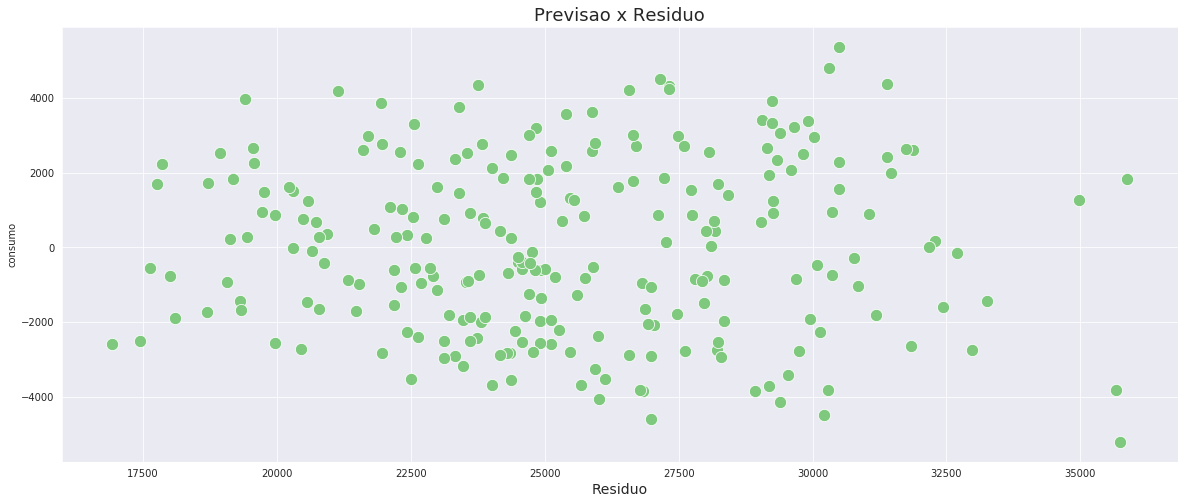

In [46]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Previsao x Residuo', fontsize=18)
ax.set_ylabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_xlabel('Residuo', fontsize=14)
ax

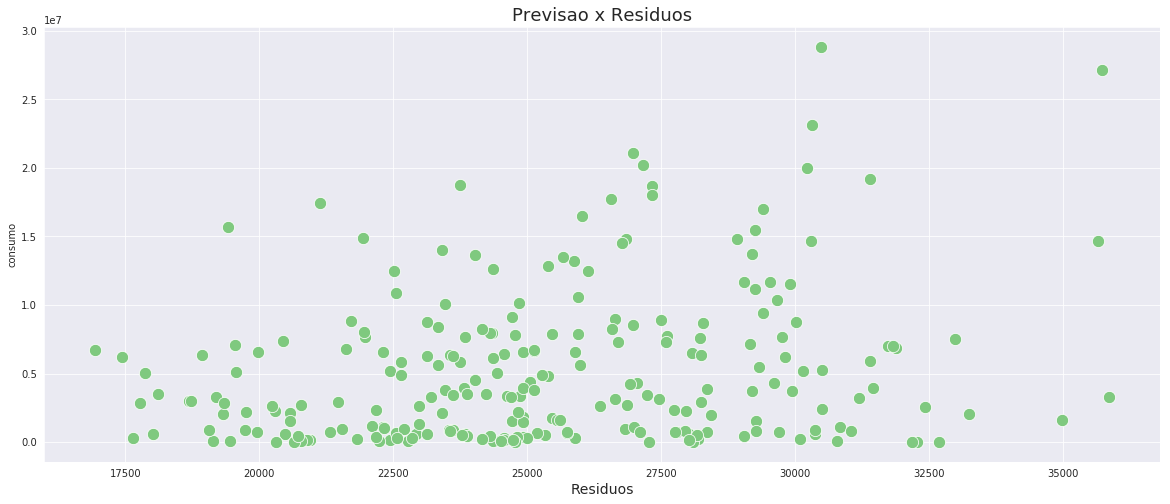

In [49]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo**2, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Previsao x Residuos', fontsize=18)
ax.set_ylabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_xlabel('Residuos', fontsize=14)
ax

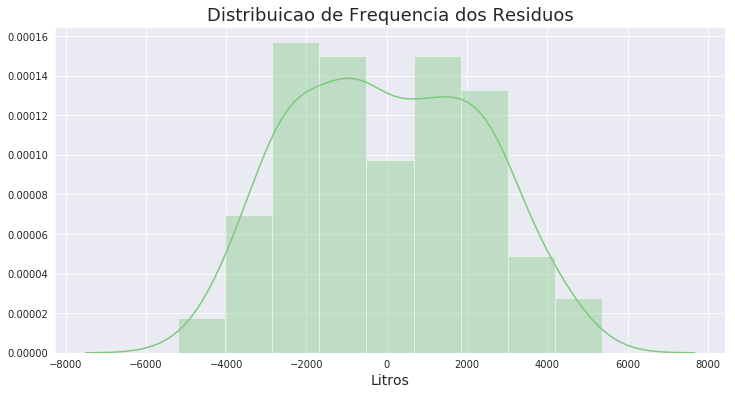

In [54]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuicao de Frequencia dos Residuos', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)
ax